# Prediction of Train Ticket Prices in Spain using Supervised Machine Learning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
data = pd.read_csv('data1.csv')
df = data.copy()

In [4]:
df.head()

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,702,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,703,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,704,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,705,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,706,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo


In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo


In [6]:
print('Rows:   ', df.shape[0])
print('Columns:', df.shape[1])

Rows:    215909
Columns: 9


In [7]:
df.dtypes

insert_date     object
origin          object
destination     object
start_date      object
end_date        object
train_type      object
price          float64
train_class     object
fare            object
dtype: object

In [8]:
df.describe()

,price
count,202321.000000
mean,56.723877
std,25.531787
min,16.600000
25%,28.350000
50%,53.400000
75%,76.300000
max,206.800000


In [9]:
df.describe(include='all')

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
count,215909,215909,215909,215909,215909,215909,202321.000000,215266,215266
unique,30543,5,5,2231,2870,16,NaN,5,5
top,2019-05-09 15:02:02,MADRID,MADRID,2019-06-02 17:30:00,2019-06-02 23:03:00,AVE,NaN,Turista,Promo
freq,90,110440,105469,2089,1278,126577,NaN,164016,132065
mean,NaN,NaN,NaN,NaN,NaN,NaN,56.723877,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,25.531787,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,16.600000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,28.350000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,53.400000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,76.300000,NaN,NaN


In [10]:
df.isnull().sum()

insert_date        0
origin             0
destination        0
start_date         0
end_date           0
train_type         0
price          13588
train_class      643
fare             643
dtype: int64

In [11]:
df.price.fillna(value=df.price.mean(), inplace=True)
df.isnull().sum()

insert_date      0
origin           0
destination      0
start_date       0
end_date         0
train_type       0
price            0
train_class    643
fare           643
dtype: int64

In [12]:
df.dropna(subset=['train_class'], inplace=True)

In [13]:
df.drop(inplace=True, axis=1, labels='insert_date')

In [14]:
df.isnull().sum()

origin         0
destination    0
start_date     0
end_date       0
train_type     0
price          0
train_class    0
fare           0
dtype: int64

<AxesSubplot:xlabel='origin', ylabel='count'>

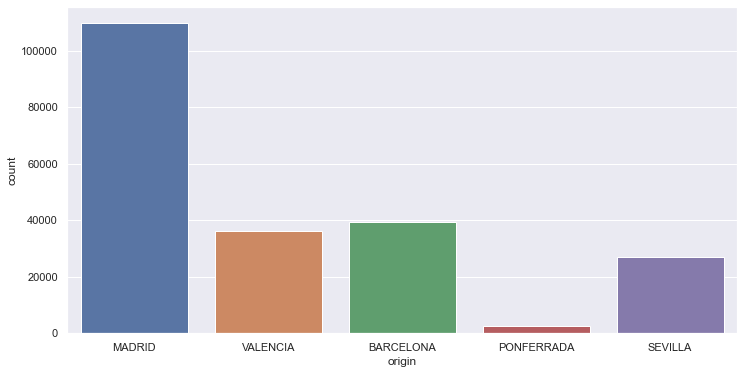

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='origin', order=[
              'MADRID', 'VALENCIA', 'BARCELONA', 'PONFERRADA', 'SEVILLA'])

<AxesSubplot:xlabel='destination', ylabel='count'>

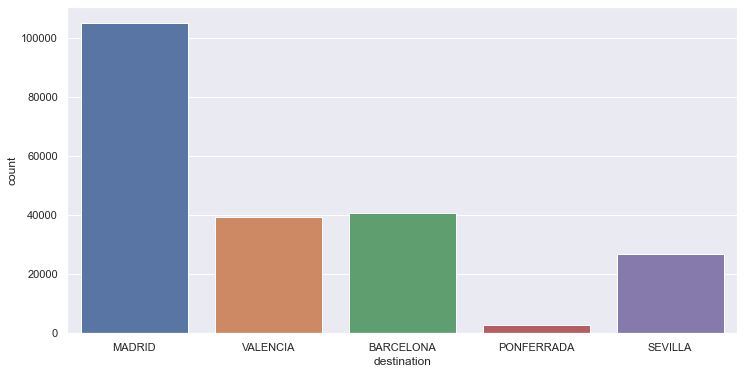

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='destination', order=[
              'MADRID', 'VALENCIA', 'BARCELONA', 'PONFERRADA', 'SEVILLA'])

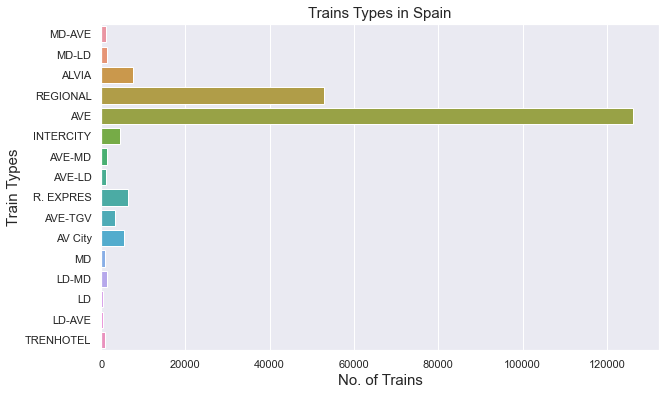

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df.train_type)
plt.xlabel('No. of Trains', {'fontsize': 15})
plt.ylabel('Train Types', {'fontsize': 15})
plt.title('Trains Types in Spain', {'fontsize': 15})

plt.show()

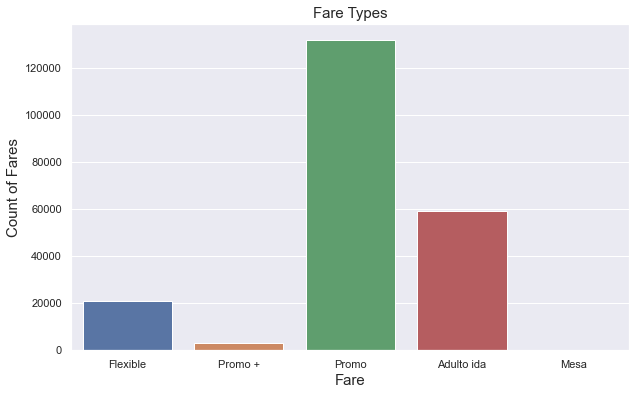

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df.fare)
plt.xlabel('Fare', fontsize=15)
plt.ylabel('Count of Fares', fontsize=15)
plt.title('Fare Types', fontsize=15)

plt.show()

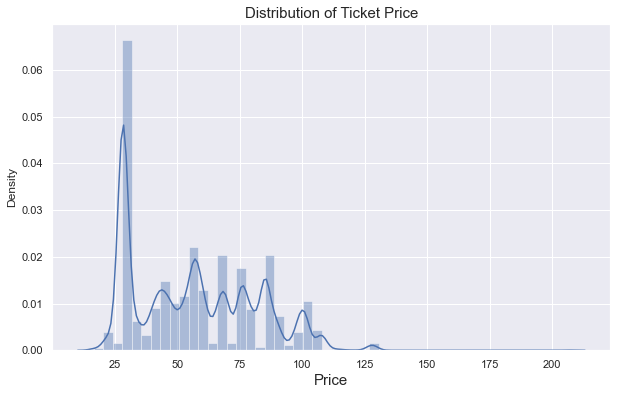

In [19]:
plt.figure(figsize=(10, 6))
sns.distplot(a=df['price'])
plt.xlabel('Price', fontsize=15)
plt.title('Distribution of Ticket Price', fontsize=15)

plt.show()

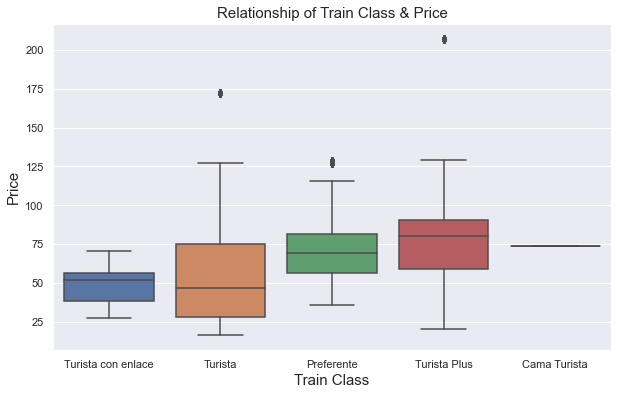

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='train_class', y='price', data=df)
plt.title('Relationship of Train Class & Price', fontsize=15)
plt.xlabel('Train Class', fontsize=15)
plt.ylabel('Price', fontsize=15)

plt.show()

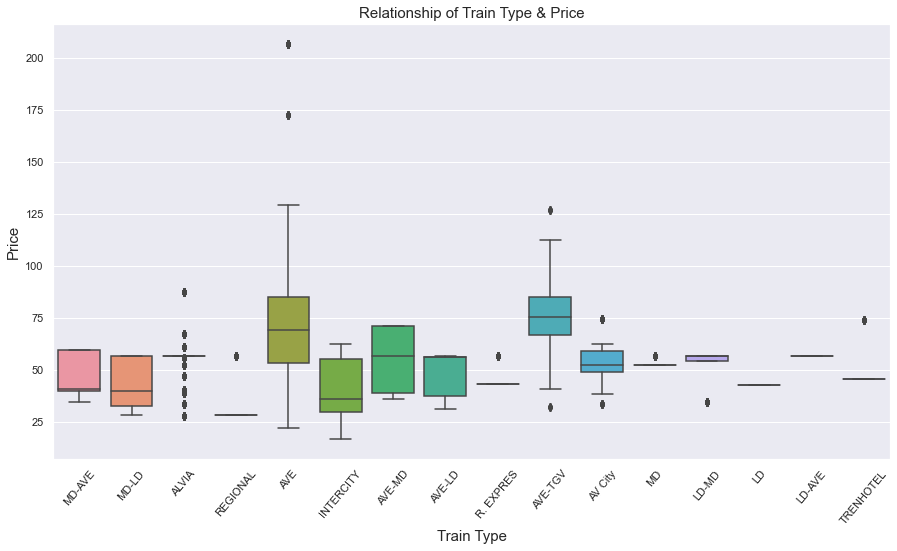

In [21]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='train_type', y='price', data=df)
plt.xticks(rotation=50)
plt.xlabel('Train Type', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Relationship of Train Type & Price', fontsize=15)

plt.show()

## Feature Engineering


In [22]:
df = df.reset_index()

In [23]:
import datetime

In [24]:
datetimeFormat = '%Y-%m-%d %H:%M:%S'


def fun(a, b):
    diff = datetime.datetime.strptime(b, datetimeFormat) - datetime.datetime.strptime(a, datetimeFormat)
    return(diff.seconds/3600.0)

In [25]:
df['travel_time_in_hrs'] = df.apply(
    lambda x: fun(x['start_date'], x['end_date']), axis=1)

In [27]:
# Checking unique combinations of origin and destination
set(zip(df['origin'], df['destination']))

{('BARCELONA', 'MADRID'),
 ('MADRID', 'BARCELONA'),
 ('MADRID', 'PONFERRADA'),
 ('MADRID', 'SEVILLA'),
 ('MADRID', 'VALENCIA'),
 ('PONFERRADA', 'MADRID'),
 ('SEVILLA', 'MADRID'),
 ('VALENCIA', 'MADRID')}

In [28]:
df['from_to'] = None  # initializing a new feature

df.loc[(df['origin'] == 'BARCELONA') & (df['destination'] == 'MADRID'), ['from_to']] = 'barc to madrid'
df.loc[(df['origin'] == 'MADRID') & (df['destination'] == 'BARCELONA'), ['from_to']] = 'madrid to barc'
df.loc[(df['origin'] == 'MADRID') & (df['destination'] == 'PONFERRADA'), ['from_to']] = 'madrid to ponf'
df.loc[(df['origin'] == 'MADRID') & (df['destination'] == 'SEVILLA'), ['from_to']] = 'madrid to sev'
df.loc[(df['origin'] == 'MADRID') & (df['destination'] == 'VALENCIA'), ['from_to']] = 'madrid to val'
df.loc[(df['origin'] == 'PONFERRADA') & (df['destination'] == 'MADRID'), ['from_to']] = 'ponf to madrid'
df.loc[(df['origin'] == 'SEVILLA') & (df['destination'] == 'MADRID'), ['from_to']]= 'sev to madrid'
df.loc[(df['origin'] == 'VALENCIA') & (df['destination'] == 'MADRID'), ['from_to']] = 'val to madrid'

df.head(20)

,index,origin,destination,start_date,end_date,train_type,price,train_class,fare,travel_time_in_hrs,from_to
0,0,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible,4.700000,ponf to madrid
1,1,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +,5.800000,ponf to madrid
2,2,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +,5.916667,ponf to madrid
3,3,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +,4.983333,ponf to madrid
4,4,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo,4.133333,ponf to madrid
5,5,MADRID,VALENCIA,2019-06-17 06:08:00,2019-06-17 12:55:00,REGIONAL,28.35,Turista,Adulto ida,6.783333,madrid to val
6,6,MADRID,VALENCIA,2019-06-17 12:21:00,2019-06-17 19:04:00,REGIONAL,28.35,Turista,Adulto ida,6.716667,madrid to val
7,7,MADRID,VALENCIA,2019-06-17 16:05:00,2019-06-17 22:47:00,REGIONAL,28.35,Turista,Adulto ida,6.700000,madrid to val
8,8,MADRID,VALENCIA,2019-06-16 06:20:00,2019-06-16 12:55:00,REGIONAL,28.35,Turista,Adulto ida,6.583333,madrid to val
9,9,MADRID,VALENCIA,2019-06-16 12:42:00,2019-06-16 19:04:00,REGIONAL,28.35,Turista,Adulto ida,6.366667,madrid to val


In [29]:
list(df.from_to.unique())

['ponf to madrid',
 'madrid to val',
 'madrid to barc',
 'sev to madrid',
 'madrid to ponf',
 'val to madrid',
 'barc to madrid',
 'madrid to sev']

In [30]:
df.drop(labels=['start_date', 'end_date'], axis=1, inplace=True)

In [31]:
df.head()

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs,from_to
0,0,PONFERRADA,MADRID,MD-AVE,59.50,Turista con enlace,Flexible,4.700000,ponf to madrid
1,1,PONFERRADA,MADRID,MD-AVE,34.65,Turista con enlace,Promo +,5.800000,ponf to madrid
2,2,PONFERRADA,MADRID,MD-LD,39.95,Turista con enlace,Promo +,5.916667,ponf to madrid
3,3,PONFERRADA,MADRID,MD-AVE,40.60,Turista con enlace,Promo +,4.983333,ponf to madrid
4,4,PONFERRADA,MADRID,ALVIA,27.90,Turista,Promo,4.133333,ponf to madrid


In [32]:
df.drop(labels=['origin', 'destination'], axis=1, inplace=True)
df.head()

,index,train_type,price,train_class,fare,travel_time_in_hrs,from_to
0,0,MD-AVE,59.50,Turista con enlace,Flexible,4.700000,ponf to madrid
1,1,MD-AVE,34.65,Turista con enlace,Promo +,5.800000,ponf to madrid
2,2,MD-LD,39.95,Turista con enlace,Promo +,5.916667,ponf to madrid
3,3,MD-AVE,40.60,Turista con enlace,Promo +,4.983333,ponf to madrid
4,4,ALVIA,27.90,Turista,Promo,4.133333,ponf to madrid


In [33]:
df.drop(labels='index', axis=1, inplace=True)
df.head()

,train_type,price,train_class,fare,travel_time_in_hrs,from_to
0,MD-AVE,59.50,Turista con enlace,Flexible,4.700000,ponf to madrid
1,MD-AVE,34.65,Turista con enlace,Promo +,5.800000,ponf to madrid
2,MD-LD,39.95,Turista con enlace,Promo +,5.916667,ponf to madrid
3,MD-AVE,40.60,Turista con enlace,Promo +,4.983333,ponf to madrid
4,ALVIA,27.90,Turista,Promo,4.133333,ponf to madrid


In [34]:
df1 = df[df['from_to'] == 'madrid to sev']

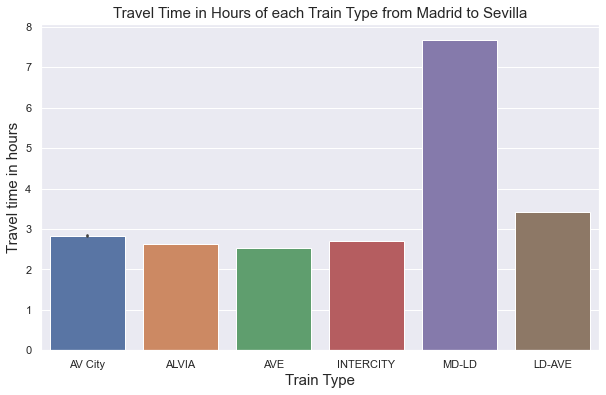

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x='train_type', y='travel_time_in_hrs', data=df1)
plt.xlabel('Train Type', fontsize=15)
plt.ylabel('Travel time in hours', fontsize=15)
plt.title('Travel Time in Hours of each Train Type from Madrid to Sevilla', fontsize=15)

plt.show()

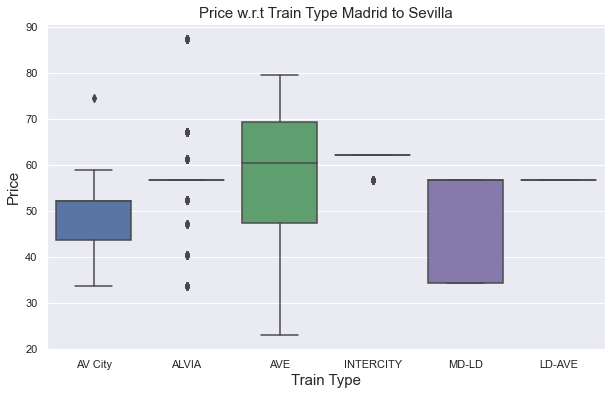

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='train_type', y='price', data=df1)
plt.title('Price w.r.t Train Type Madrid to Sevilla', fontsize=15)
plt.xlabel('Train Type', fontsize=15)
plt.ylabel('Price', fontsize=15)

plt.show()

In [37]:
df1 = df[df['from_to'] == 'madrid to barc']

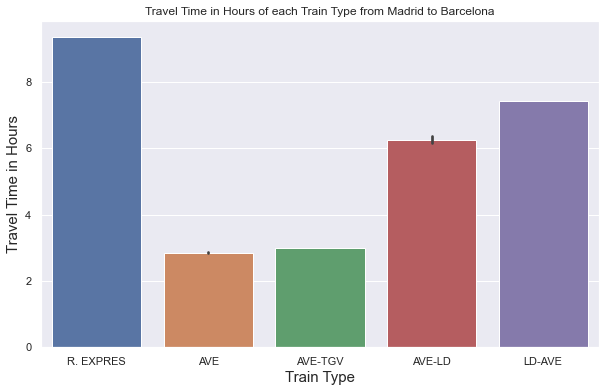

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x='train_type', y='travel_time_in_hrs', data=df1)
plt.title('Travel Time in Hours of each Train Type from Madrid to Barcelona')
plt.xlabel('Train Type', fontsize=15)
plt.ylabel('Travel Time in Hours', fontsize=15)

plt.show()

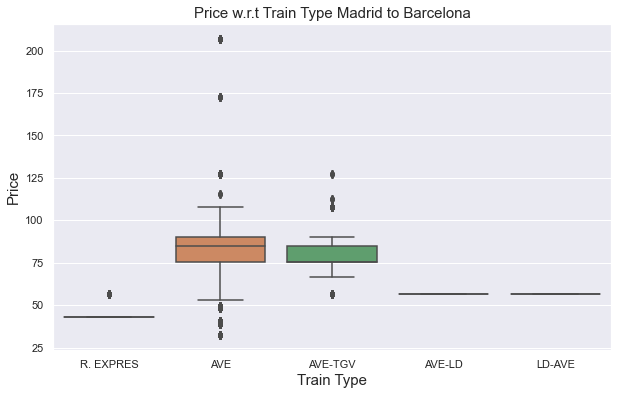

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='train_type', y='price', data=df1)
plt.title('Price w.r.t Train Type Madrid to Barcelona', fontsize=15)
plt.xlabel('Train Type', fontsize=15)
plt.ylabel('Price', fontsize=15)

plt.show()

In [40]:
df1 = df1 = df[df['from_to'] == 'madrid to val']

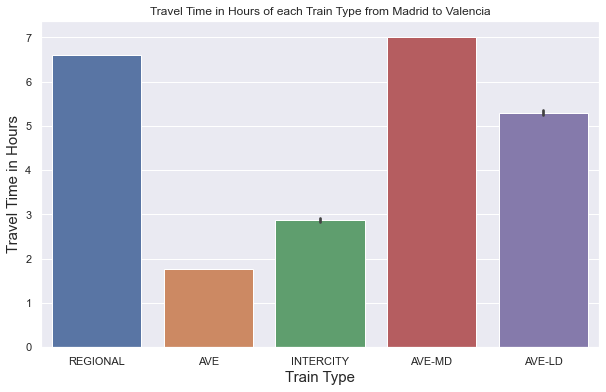

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(x='train_type', y='travel_time_in_hrs', data=df1)
plt.title('Travel Time in Hours of each Train Type from Madrid to Valencia')
plt.xlabel('Train Type', fontsize=15)
plt.ylabel('Travel Time in Hours', fontsize=15)

plt.show()

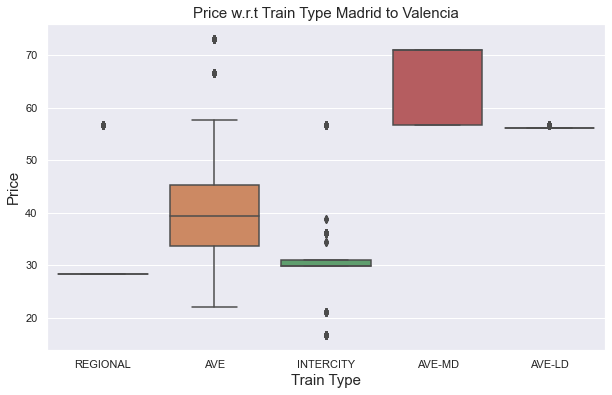

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='train_type', y='price', data=df1)
plt.title('Price w.r.t Train Type Madrid to Valencia', fontsize=15)
plt.xlabel('Train Type', fontsize=15)
plt.ylabel('Price', fontsize=15)

plt.show()

In [43]:
df1 = df[df['from_to'] == 'madrid to ponf']

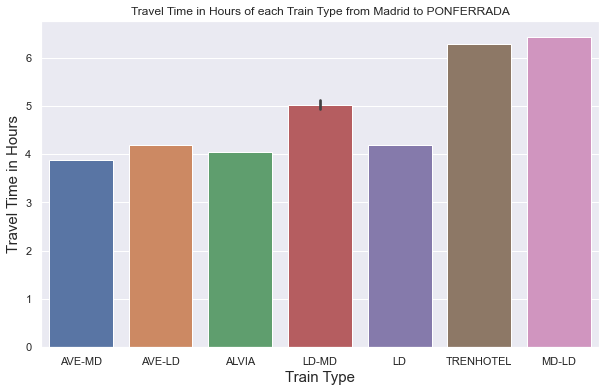

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x='train_type', y='travel_time_in_hrs', data=df1)
plt.title('Travel Time in Hours of each Train Type from Madrid to PONFERRADA')
plt.xlabel('Train Type', fontsize=15)
plt.ylabel('Travel Time in Hours', fontsize=15)

plt.show()

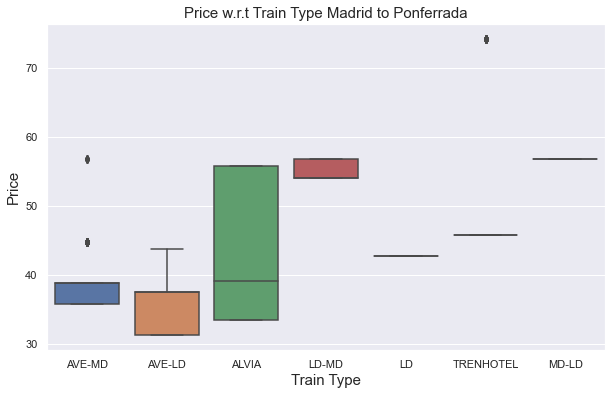

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='train_type', y='price', data=df1)
plt.title('Price w.r.t Train Type Madrid to Ponferrada', fontsize=15)
plt.xlabel('Train Type', fontsize=15)
plt.ylabel('Price', fontsize=15)

plt.show()

# Modelling

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
lab_en = LabelEncoder()

df.iloc[:,0] = lab_en.fit_transform(df.iloc[:,0])
df.iloc[:,2] = lab_en.fit_transform(df.iloc[:,2])
df.iloc[:,3] = lab_en.fit_transform(df.iloc[:,3])
df.iloc[:,4] = lab_en.fit_transform(df.iloc[:,4])
df.iloc[:,5] = lab_en.fit_transform(df.iloc[:,5])

In [48]:
df.head()

,train_type,price,train_class,fare,travel_time_in_hrs,from_to
0,11,59.50,4,1,47,5
1,11,34.65,4,4,53,5
2,12,39.95,4,4,54,5
3,11,40.60,4,4,48,5
4,0,27.90,2,3,44,5


In [49]:
X = df.drop(['price'], axis=1)
Y = df[['price']]

print(X.shape)
print(Y.shape)

(215266, 5)
(215266, 1)


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=25, test_size=0.30, shuffle=True)

## Applying Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lr = LinearRegression()

In [54]:
lr.fit(X_train, Y_train)

LinearRegression()

In [55]:
lr_predict = lr.predict(X_test)

In [56]:
lr_predict_train = lr.predict(X_train)

In [57]:
from sklearn.metrics import r2_score

In [58]:
lr_r2_test = r2_score(y_true=Y_test, y_pred=lr_predict)

In [59]:
lr_r2_train = r2_score(Y_train, lr_predict_train)

Comaparing training and testing R2 scores

In [60]:
print('R2 score for Linear Regression Training Data is: ', lr_r2_train)
print('R2 score for Linear Regression Testing Data is:  ', lr_r2_test)

R2 score for Linear Regression Training Data is:  0.6356267926032114
R2 score for Linear Regression Testing Data is:   0.640611515048867


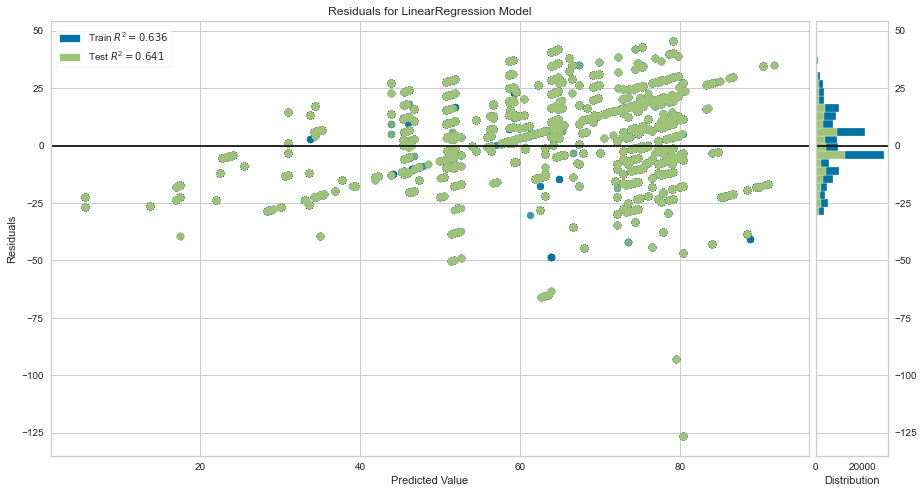

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [62]:
from yellowbrick.regressor import ResidualsPlot

plt.figure(figsize=(15, 8))
visualizer = ResidualsPlot(lr)
visualizer.fit(X_train.values, Y_train.values)
visualizer.score(X_test.values, Y_test.values)
visualizer.poof()

## Applying KNN

In [69]:
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors=15)

In [64]:
model_knn.fit(X_train, Y_train)
knn_pred = model_knn.predict(X_test)


In [65]:
knn_r2 = r2_score(Y_test, knn_pred)
knn_r2

0.8761644868635545

In [ ]:
plt.figure(figsize=(15, 9))
sns.lineplot(x=n_neighbors, y=knn_r2_lst)

In [ ]:
knn_r2_lst = []
n_neighbors = []

for i in range(1, 31):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, Y_train)
    knn_pred = knn.predict(X_test)
    knn_r2 = r2_score(Y_test, knn_pred)
    
    knn_r2_lst.append(knn_r2)
    n_neighbors.append(i)

In [ ]:
knn = KNeighborsRegressor(n_neighbors=30)
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)
knn_r2_test = r2_score(Y_test, knn_pred)

knn_pred_tr = knn.predict(X_train)
knn_r2_train = r2_score(Y_train, knn_pred_tr)

knn_r2_train, knn_r2_test

## Applying Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model_dt = DecisionTreeRegressor(max_depth=20, criterion='mse', random_state=25)

In [ ]:
model_dt.fit(X_train, Y_train)

In [ ]:
dt_pred_train = model_dt.predict(X_train)
dt_pred_test = model_dt.predict(X_test)

dt_r2_train = r2_score(Y_train, dt_pred_train)
dt_r2_test = r2_score(Y_test, dt_pred_test)

dt_r2_train, dt_r2_test

# Comparison

In [ ]:
r2_dict = {
    'Linear': [lr_r2_train, lr_r2_test],
    'K-Nearest Neighbors': [knn_r2_train, knn_r2_test],
    'Decision Trees': [dt_r2_train, dt_r2_test]
}

In [ ]:
scores = pd.DataFrame(data=r2_dict, index=['R2 Train', 'R2 Test'])
scores